<a href="https://colab.research.google.com/github/Nagmashaik123/INFO5502/blob/master/DataMining_Movies_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Importing libraries numpy, pandas, matplotlib.pyplot and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Loading the IMDB rating.csv which contains the title id's and their corresponding ratings from different aspects
imdb_data=pd.read_csv('/content/IMDb ratings.csv')

In [20]:
# printing top 5 rows
imdb_data.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.0,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,32,16,5,6,4,NaN,NaN,5.5,25.0,5.8,72.0,6.2,62.0,5.9,146.0,NaN,NaN,5.5,21.0,5.9,67.0,6.2,55.0,5.7,15.0,NaN,NaN,5.8,4.0,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,117,63,26,25,16,NaN,NaN,5.3,23.0,5.0,111.0,5.3,193.0,5.1,299.0,NaN,NaN,5.2,20.0,4.9,96.0,5.2,171.0,5.9,39.0,NaN,NaN,5.7,3.0,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,169,66,39,20,87,7.5,4.0,7.0,402.0,7.0,895.0,7.1,482.0,7.0,1607.0,8.0,2.0,7.0,346.0,7.0,804.0,7.0,396.0,7.2,215.0,7.0,2.0,7.0,52.0,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [21]:
# Loading the IMDB movies.csv which contains the title id's and their cast & crew, release dates .. which are required for the analysis
imdb_titles=pd.read_csv('/content/IMDb movies.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
# printing top 5 rows
imdb_titles.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [22]:
# Importing and reading contents from ratings and movies .csv
imdb_ratings=pd.read_csv('/content/IMDb ratings.csv',usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('/content/IMDb movies.csv', usecols=['title','year','genre'])

# Creating the ratings frame based on weighted_average_vote column from ratings.csv 
# Frame contains infrom from Release year, rating and genre
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})

# Dropping duplicate rows having same title, release year and rating and then resetting their index
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



(85852, 4)

In [23]:
ratings

,Title,Release Year,Rating,Genre
0,Miss Jerry,1894,5.9,Romance
1,The Story of the Kelly Gang,1906,6.1,"Biography, Crime, Drama"
2,Den sorte drøm,1911,5.8,Drama
3,Cleopatra,1912,5.2,"Drama, History"
4,L'Inferno,1911,7.0,"Adventure, Drama, Fantasy"
...,...,...,...,...
85850,Le lion,2020,5.3,Comedy
85851,De Beentjes van Sint-Hildegard,2020,7.7,"Comedy, Drama"
85852,Padmavyuhathile Abhimanyu,2019,7.9,Drama
85853,Sokagin Çocuklari,2019,6.4,"Drama, Family"


In [24]:
df=pd.read_csv('/content/netflix_titles.csv')

In [25]:
#Performing inner join on the two data sets having movie titles from netflix_titles.csv and their corresponding ratings from IMDB
ratings.dropna()
join_data=ratings.merge(df,left_on='Title', right_on='title',how='inner')
join_data=join_data.sort_values(by='Rating',ascending=False)

In [26]:
# printing top 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [27]:
# Installing necessary plotly with version 4.5.2 to support below graph
!pip install plotly==4.5.2

In [28]:
# Visualising the analysis of the movie and their rating for 10 different countries having top ratings
import plotly.express as px
top_rated=join_data[0:10]
fig=px.sunburst(top_rated,path=['title','country'],values='Rating',color='Rating')
fig.show()

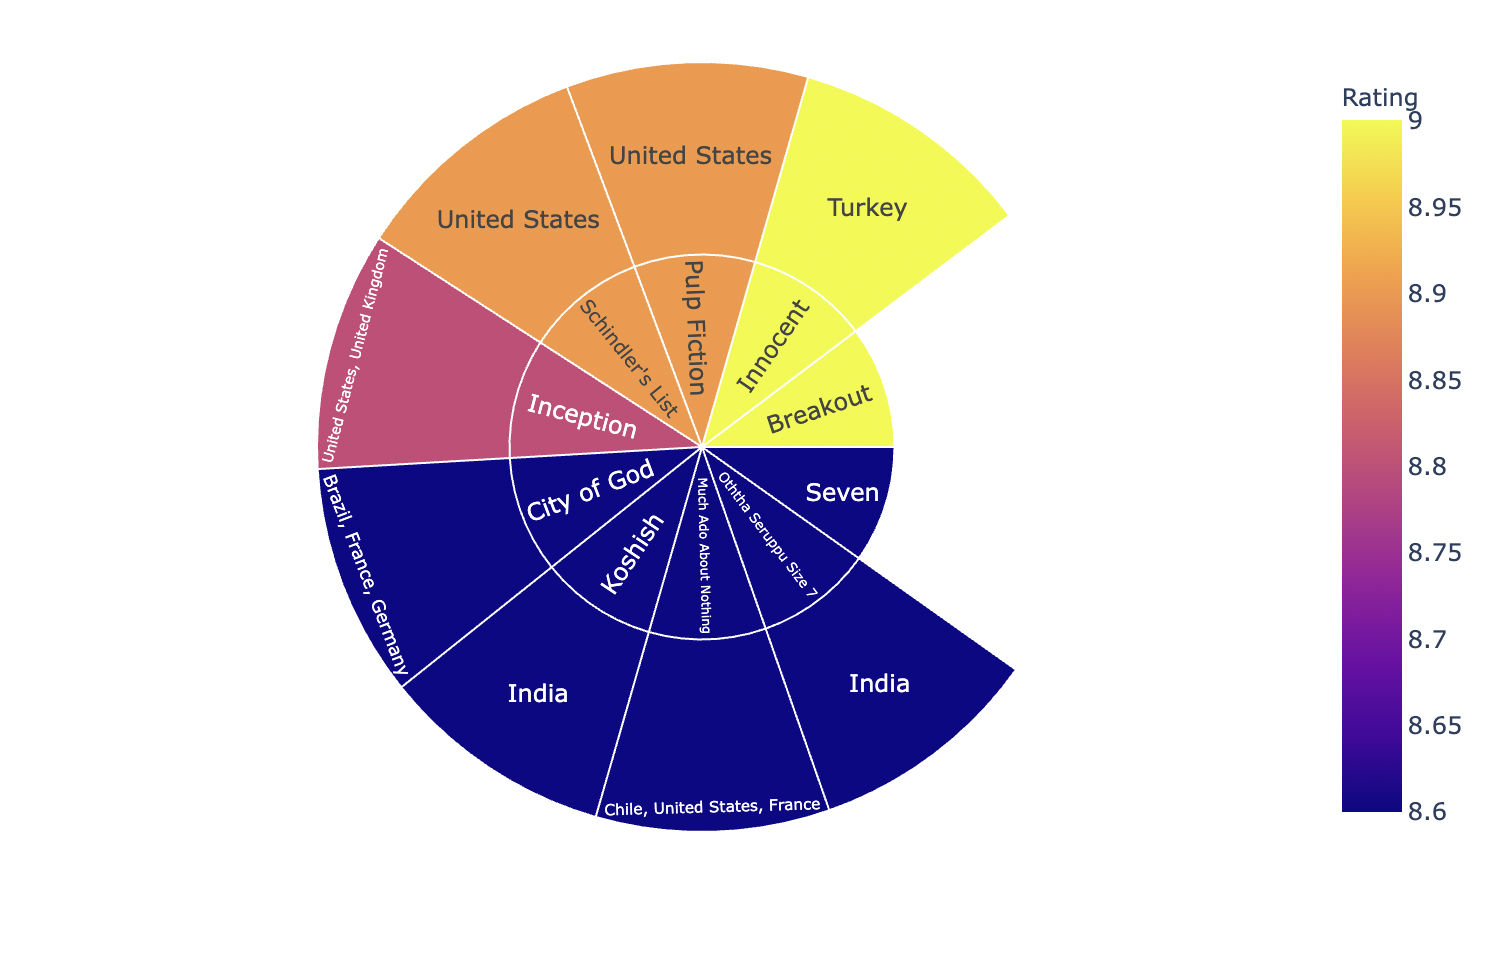

In [ ]:
# Returning countries having highest rated content is being counted and sorted in descending order with top 11 rows
country_count=join_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
top_countries=country_count[0:11]
top_countries

,country
United States,865
India,718
United Kingdom,119
Canada,57
Philippines,50
Spain,41
South Korea,38
Indonesia,38
France,37
Nigeria,31


In [ ]:
# Visualising the countries having highest rated content is being counted and sorted in descending order with top 11 rows
import plotly.express as px
data = dict(
    number=[865,718,119,57,50,41,38,38,37,31,31],
    country=["United States", "India", "United Kingdom", "Canada", "Philippines", "Spain", "South Korea", "Australia", "Indonesia", "France", "Mexico"])
fig = px.funnel(data, x='number', y='country')
fig.show()

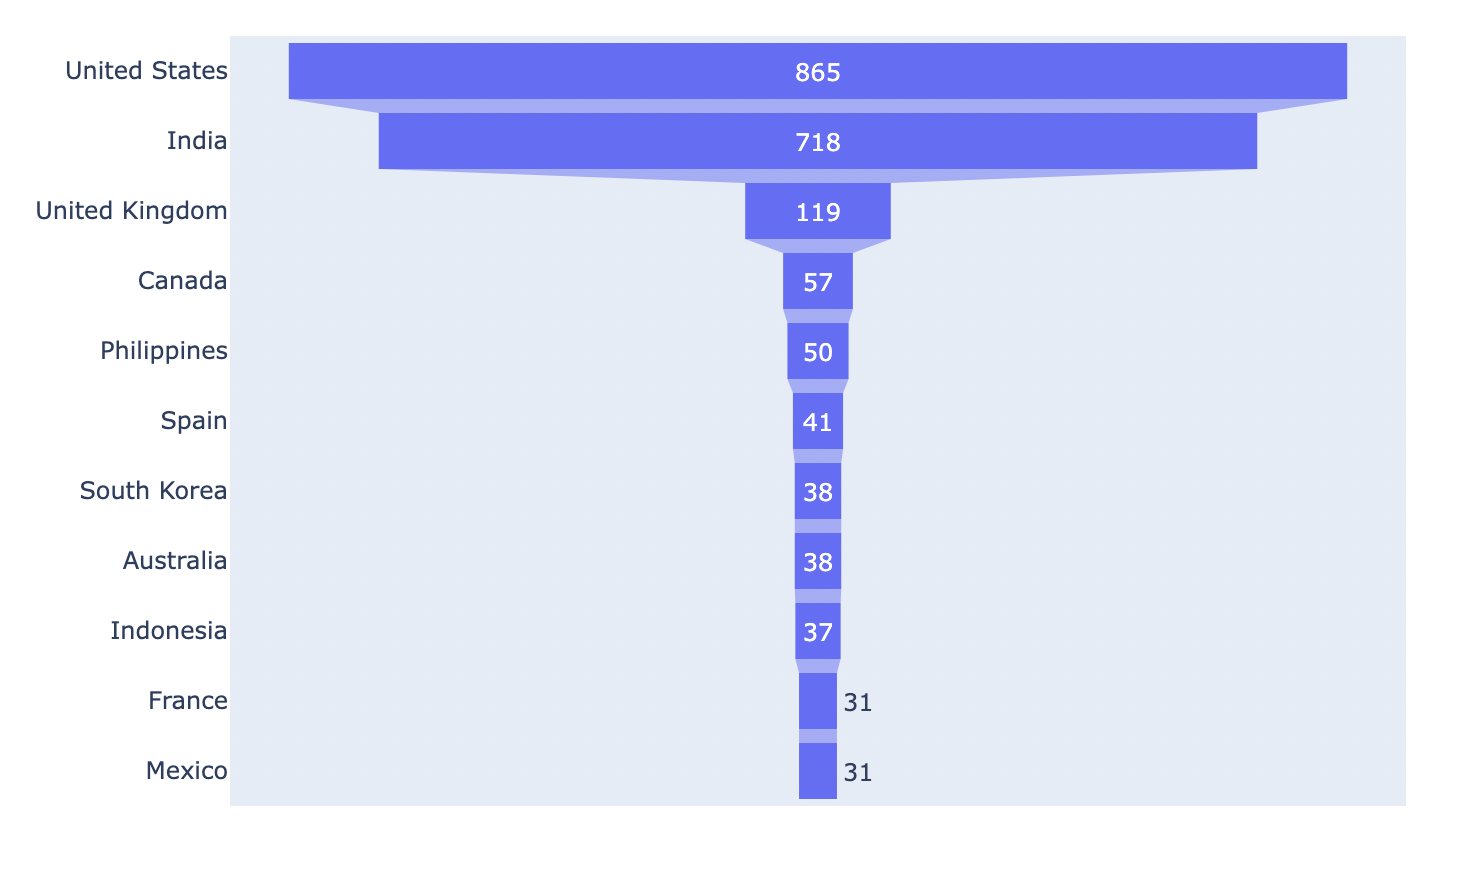